In [25]:
import matplotlib.pyplot as plt
import glob
import zipfile
import io
import pandas as pd
import numpy as np
import scipy.stats as stats

In [53]:
U_list = glob.glob('dmft_results/U_-2.0')

for U in U_list:
    beta_file_list = glob.glob(f'{U}/beta_*')
    beta_list = []
    order_parameter_list = []
    
    for beta_file in beta_file_list:
        beta = float(beta_file.split('/')[-1].split('_')[1].strip('.zip'))
        beta_list.append(beta)
        
        with zipfile.ZipFile(f'{beta_file}', 'r') as beta_zip:
            with io.TextIOWrapper(beta_zip.open(f'beta_{beta}/dmft.result')) as f:
                ifile = iter(f.readlines())
                for line in ifile:
                    if line.startswith('# orbital    2    1'):
                        order_parameter_list.append(float(next(ifile, '').strip()))
    
    
    results = pd.DataFrame({'beta': beta_list, 'order_parameter': order_parameter_list, 'temperature': 1/np.array(beta_list)})
    results.sort_values(by=["beta"], inplace=True)
    results.reset_index(inplace=True)
    results.drop(['index'], axis=1, inplace=True)

Text(0, 0.5, 'OP')

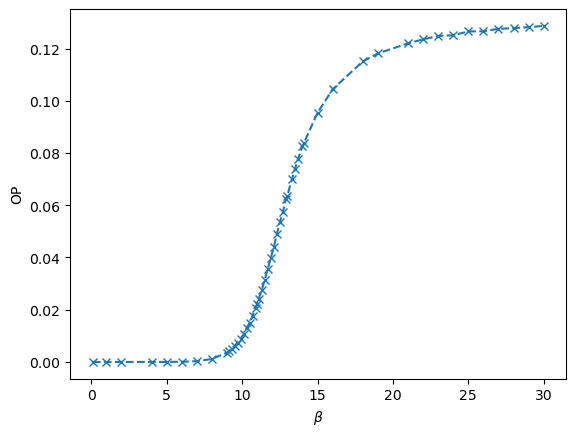

In [54]:
plt.plot(results.loc[:,'beta'], results.loc[:,'order_parameter'] , 'x--')
plt.xlabel("$\\beta$")
plt.ylabel("OP")

Ranges:
U=-3.0: beta=1 to beta=14
U=-4.0: beta=1 to beta=10
U=-5.0: to beta=8
U=-6.0: to beta=8

Text(0, 0.5, 'OP')

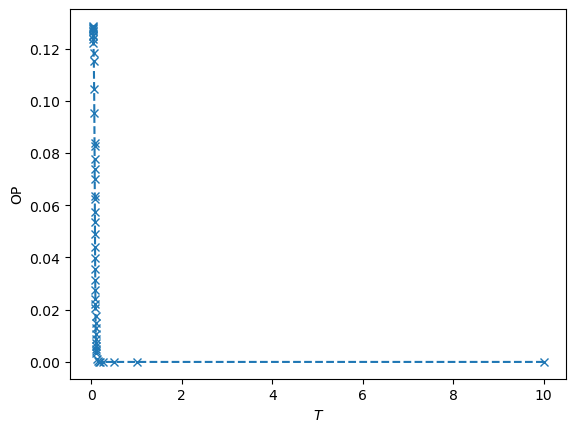

In [55]:
plt.plot(results.loc[:,'temperature'], results.loc[:,'order_parameter'] , 'x--')
plt.xlabel("$T$")
plt.ylabel("OP")

Text(0, 0.5, '$\\vert OP \\vert^2$')

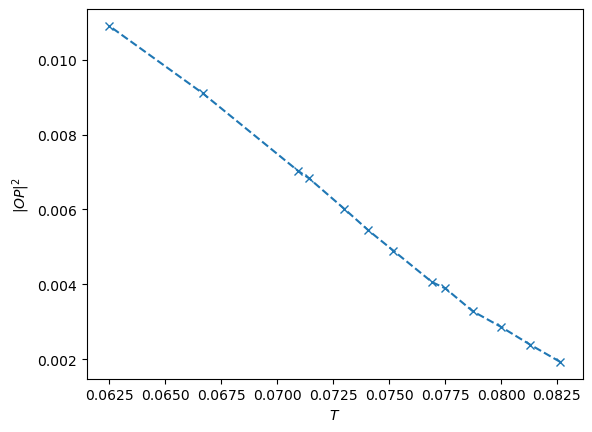

In [66]:
linear_T_interval = results[(results['beta'] > 12) & (results['beta'] < 18)]
plt.plot(linear_T_interval.loc[:,'temperature'], np.abs(linear_T_interval.loc[:,'order_parameter'])**2 , 'x--')
plt.xlabel("$T$")
plt.ylabel("$\\vert OP \\vert^2$")

T_C = 0.08621486661883893, beta_C = 11.598927646911056


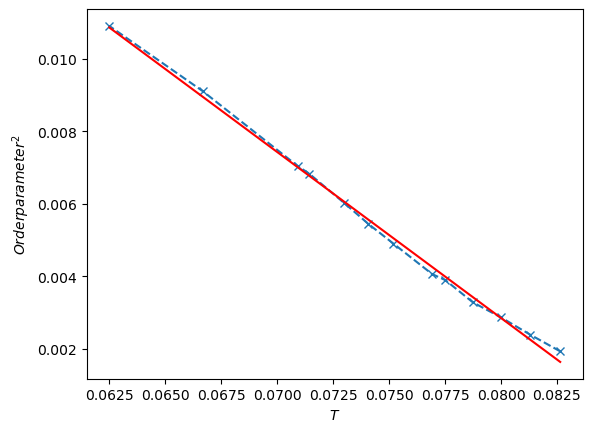

In [68]:
linear_reg = stats.linregress(linear_T_interval['temperature'], np.abs(linear_T_interval['order_parameter'])**2)

plt.plot(linear_T_interval.loc[:,'temperature'], np.abs(linear_T_interval.loc[:,'order_parameter'])**2 , 'x--')
plt.plot(linear_T_interval.loc[:, 'temperature'], linear_reg.intercept + linear_reg.slope * linear_T_interval.loc[:,'temperature'], 'r-')
plt.xlabel("$T$")
plt.ylabel("$Order parameter^2$")

critical_temp = - linear_reg.intercept / linear_reg.slope

print(f"T_C = {critical_temp}, beta_C = {1/critical_temp}")